In [1]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import os

print("All imports successful")

All imports successful


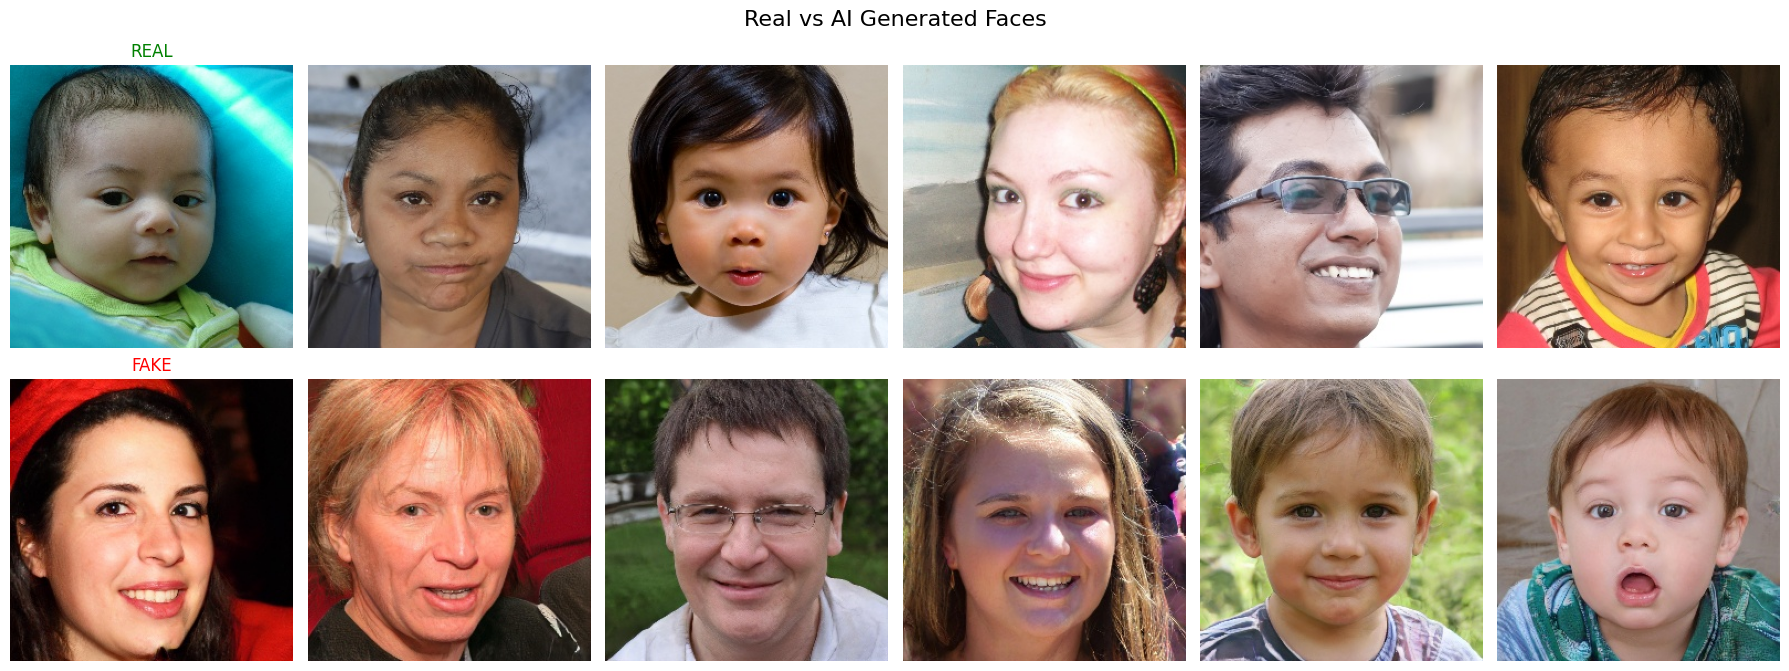

In [2]:
base = '../data/raw/faces'
fig, axes = plt.subplots(2, 6, figsize=(18, 7))
fig.suptitle('Real vs AI Generated Faces', fontsize=16)

for i, label in enumerate(['real', 'fake']):
    folder = os.path.join(base, 'train', label)
    files = os.listdir(folder)[:6]
    for j, fname in enumerate(files):
        img = Image.open(os.path.join(folder, fname))
        axes[i, j].imshow(img)
        axes[i, j].axis('off')
        if j == 0:
            axes[i, j].set_title(label.upper(), fontsize=12,
                                 color='green' if label=='real' else 'red')

plt.tight_layout()
plt.savefig('../results/face_samples.png')
plt.show()

In [3]:
sample_real = Image.open(os.path.join(base, 'train', 'real', os.listdir(os.path.join(base, 'train', 'real'))[0]))
sample_fake = Image.open(os.path.join(base, 'train', 'fake', os.listdir(os.path.join(base, 'train', 'fake'))[0]))

print(f'Real image size: {sample_real.size}')
print(f'Fake image size: {sample_fake.size}')
print(f'Real image mode: {sample_real.mode}')
print(f'Fake image mode: {sample_fake.mode}')

Real image size: (256, 256)
Fake image size: (256, 256)
Real image mode: RGB
Fake image mode: RGB


In [4]:
import numpy as np
from PIL import Image
import os
import matplotlib.pyplot as plt

def get_pixel_stats(folder, n_samples=500):
    files = os.listdir(folder)[:n_samples]
    means = []
    stds = []
    for fname in files:
        img = np.array(Image.open(os.path.join(folder, fname))) / 255.0
        means.append(img.mean(axis=(0,1)))
        stds.append(img.std(axis=(0,1)))
    return np.array(means), np.array(stds)

base = '../data/raw/faces'
real_means, real_stds = get_pixel_stats(os.path.join(base, 'train', 'real'))
fake_means, fake_stds = get_pixel_stats(os.path.join(base, 'train', 'fake'))

print("REAL faces - Mean RGB:", real_means.mean(axis=0).round(3))
print("REAL faces - Std RGB:", real_stds.mean(axis=0).round(3))
print("FAKE faces - Mean RGB:", fake_means.mean(axis=0).round(3))
print("FAKE faces - Std RGB:", fake_stds.mean(axis=0).round(3))

REAL faces - Mean RGB: [0.526 0.433 0.391]
REAL faces - Std RGB: [0.254 0.23  0.226]
FAKE faces - Mean RGB: [0.524 0.428 0.379]
FAKE faces - Std RGB: [0.242 0.217 0.216]


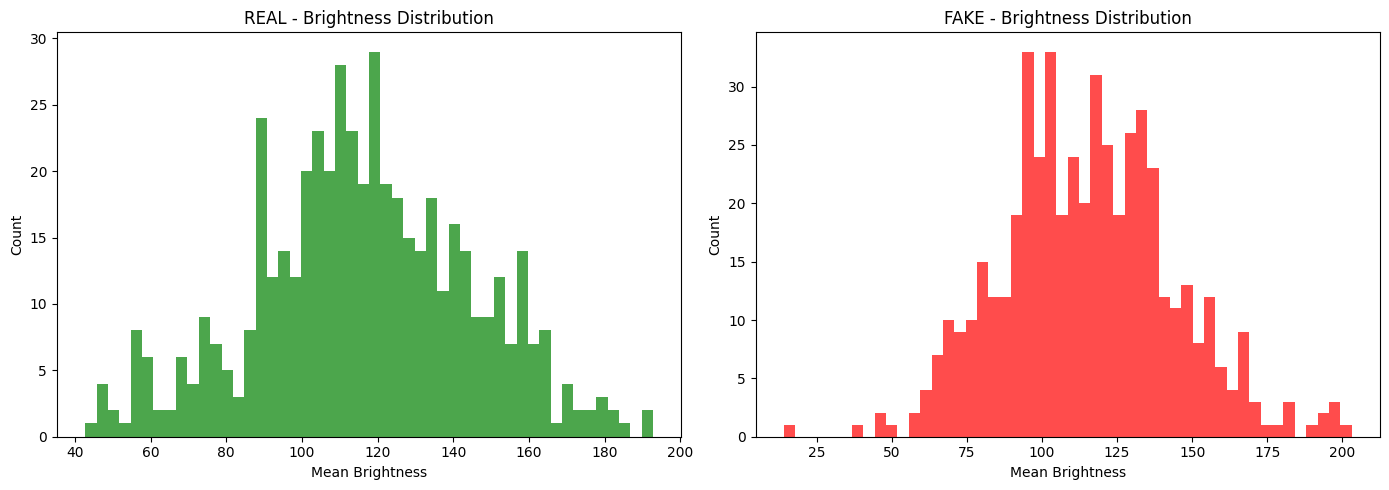

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

for ax, label, color in zip(axes, ['real', 'fake'], ['green', 'red']):
    folder = os.path.join(base, 'train', label)
    files = os.listdir(folder)[:500]
    brightness = []
    for fname in files:
        img = np.array(Image.open(os.path.join(folder, fname)).convert('L'))
        brightness.append(img.mean())
    ax.hist(brightness, bins=50, color=color, alpha=0.7)
    ax.set_title(f'{label.upper()} - Brightness Distribution')
    ax.set_xlabel('Mean Brightness')
    ax.set_ylabel('Count')

plt.tight_layout()
plt.savefig('../results/brightness_distribution.png')
plt.show()

In [6]:
import sys
sys.path.append('..')
from src.dataset import get_dataloader
import torch

loader = get_dataloader('../data/raw/faces', split='train', batch_size=32)
images, labels = next(iter(loader))

print(f'Batch image shape: {images.shape}')
print(f'Batch labels shape: {labels.shape}')
print(f'Label values: {labels[:10]}')
print(f'Image dtype: {images.dtype}')
print(f'Image min/max: {images.min():.3f} / {images.max():.3f}')

Batch image shape: torch.Size([32, 3, 224, 224])
Batch labels shape: torch.Size([32])
Label values: tensor([1, 0, 1, 0, 1, 1, 1, 1, 0, 0])
Image dtype: torch.float32
Image min/max: -2.118 / 2.640


In [7]:
import sys
sys.path.append('..')
from src.model import get_model, count_parameters
import torch

model = get_model('resnet50', pretrained=True)
count_parameters(model)

# Test a forward pass with a dummy batch
dummy_input = torch.randn(4, 3, 224, 224)  # 4 fake images
output = model(dummy_input)
print(f'Output shape: {output.shape}')
print(f'Output values: {output.detach().numpy().flatten()}')

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to C:\Users\Nikita_Sangwan/.cache\torch\hub\checkpoints\resnet50-0676ba61.pth


100%|██████████| 97.8M/97.8M [00:05<00:00, 19.3MB/s]


Total parameters: 23,510,081
Trainable parameters: 23,510,081
Output shape: torch.Size([4, 1])
Output values: [0.56620735 0.6294165  0.44787857 0.41714764]
